# Урок 7

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

from matplotlib import pylab as plt
%matplotlib inline

from scipy.optimize import fsolve

# Производная функции нескольких переменных. Часть 1

На прошлых уроках мы познакомились с производными функций одного переменного. Сегодня обощим это понятие на функции нескольких переменных. Сегодня на уроке мы разберем следущие темы:

- дифференциал функции и частные производные;

- градиент;

- физический смысл;

- производная по направлению;

- экстремум функции 2-х переменных;

- аппроксимация. Метод наименьших квадратов.



Если идти по ВУЗовской программе, то для начала нам потребуется обобщить понятие предела на функции нескольких переменных. Но мы дадим определение дифференциала и уже его перевеем на функции нескольких переменных.

### Дифференциал функции и частные производные

Вспомним определение производной функции одного переменного:

### $$f'(x)=\lim_{\Delta x\to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Есть более короткая запись данного равенства:

### $$f'(x)=\frac{df(x)}{dx}$$

где $df(x)$ называется дифференциал (приращение) функции, $dx$ - дифференциал (приращение) аргумента.

Из последнего равенства как раз мы и получаем значение дифференциала функции:

### $$df(x)=f'(x) \cdot dx$$

т.е. дифференциал функции равен производной функции умноженной на дифференциал аргумента.

#### Примеры


1. 
###  $$d(x^2)=2x \cdot dx$$


2. 
### $$d(3x^2-4x+10)=(6x-4) \cdot dx$$


3. 
### $$d(\sin x)=\cos x \cdot dx$$


4. 
### $$d(\sin (x^2))=\cos (x^2) \cdot d(x^2)=\cos (x^2) \cdot 2x \cdot dx$$

Существует так же и дифференциал второго порядка. Он равен дифференциалу от первого дифференциала. Т.е:

### $$d^2f(x)=d(df(x))=d(f'(x) \cdot dx)=f''(x) \cdot dx\cdot dx=f''(x) \cdot dx^2$$

#### Примеры


1. 
### $$d^2(x^2)=2 \cdot dx^2$$


2. 
### $$d^2(\sin x)=-\sin x \cdot dx^2$$

Рассмотрим теперь функцию $U=f(x,y)$, зависящую от двух переменных $x$ и $y$.

Ее дифференциал будет выглядеть в следующей виде:


### $$dU=\frac{\partial U}{\partial x}dx+\frac{\partial U}{\partial y}dy=U'_{x}dx+U'_{y}dy$$

где $\frac{\partial U}{\partial x}=U'_{x}$ - частная производная по оси $x$, а $\frac{\partial U}{\partial y}=U'_{y}$ - частная производная по оси $y$.

$\partial$ и $d$ - это дифференциалы. Первые написаны курсивом, чтобы их не путали с обычными и не сокращали. Дело в том что, если мы берем частную производную, например $U'_{x}$, остальные переменными мы считает зафиксированными (константами). Поэтому $\partial x$ - это приращение $x$ в частном случае. При этом сама функция может меняться как ей угодно, поэтому $dx$ это приращение $x$ в общем случае.
Дифференциал второго порядка от функции двух переменных имеет следующий вид:

### $$dU^2=\frac{\partial^2 U}{\partial x^2}dx^2+\frac{\partial^2 U}{\partial x\partial y}dxdy+\frac{\partial^2 U}{\partial y\partial x}dydx+\frac{\partial^2 U}{\partial y^2}dy^2=$$

### $$=U''_{xx}dx^2+U''_{xy}dxdy+U''_{yx}dydx+U''_{yy}dy^2$$

Для гладких функций, смешанные производные совпадают $U''_{xy}=U''_{yx}$. Кусочные функции рассматривать на курсе мы не будем, поэтому запись можно упростить:

### $$dU^2=\frac{\partial^2 U}{\partial x^2}dx^2+2\frac{\partial^2 U}{\partial x\partial y}dxdy+\frac{\partial^2 U}{\partial y^2}dy^2=$$

### $$=U''_{xx}dx^2+2U''_{xy}dxdy+U''_{yy}dy^2$$

#### Примеры 

1. Возьмем функцию двух переменных:
### $$U(x,y)=5x^2+7y^3 \sin x−\ln x \cdot \mbox{tg}y+10y−13$$

Найдем все частные производные первого и второго порядка.

### $$U'_{x}=10x+7y^3 \cos x −\frac{\mbox{tg} y}{x}$$

### $$U'_{y}=21y^2 \sin x−\frac{\ln x}{\cos^2 y}+10$$

### $$U''_{xx}=10-7y^3 \sin x +\frac{\mbox{tg} y}{x^2}$$

### $$U''_{yy}=42y \sin x−\frac{2\ln x \cdot \sin y}{\cos^3 y}$$

### $$U''_{xy}=21y^2 \cos x −\frac{1}{x \cos^2 y}$$

### $$U''_{yx}=21y^2 \cos x −\frac{1}{x \cos^2 y}$$

Можно заметить, что $U''_{xy}=U''_{yx}$. Этот факт в процессе обучения можно использовать в качестве проверки. Если смешанные производные совпадают, то скорее всего производные найдены правильно. Хотя возможно допущены сразу две ошибки, которые и привели к одному ответу.

Запишем полные дифференциалы первого и второго порядка.

### $$dU=(10x+7y^3 \cos x −\frac{\mbox{tg} y}{x})dx+(21y^2 \sin x−\frac{\ln x}{\cos^2 y}+10)dy$$

### $$dU^2=(10-7y^3 \sin x +\frac{\mbox{tg} y}{x^2})dx^2+2(21y^2 \cos x −\frac{1}{x \cos^2 y})dxdy+(42y \sin x−\frac{2\ln x \cdot \sin y}{\cos^3 y})dy^2$$

Видно, что записи выглядят довольно громозко и не приятно. Как правило, полные дифференциалы рассматривают в конкретной точке (при конкретных значениях $x$ и $y$). Поэтому записи упростятся. Ближе к концу методички рассмотрим  подобные примеры.

#### Примеры 

2. Возьмем теперь функцию трёх переменных:
### $$U(x,y,z )=3y^3z^2+5x^5 \ln z−\sin x\cdot \cos y+11y−9x+3z−20$$

Найдем все частные производные первого и второго порядка.

### $$U'_{x}=25x^4 \ln z−\cos x \cdot \cos y−9$$

### $$U'_{y}=9y^2z^2+\sin x\cdot \sin y+11$$

### $$U'_{z}=6y^3z+\frac{5x^5}{z}+3$$

### $$U''_{xx}=100x^3 \ln z+\sin x \cdot \cos y$$

### $$U''_{xy}=\cos x \cdot \sin y$$

### $$U''_{xz}=\frac{25x^4}{z}$$

### $$U''_{yx}=\cos x\cdot \sin y$$

### $$U''_{yy}=18yz^2+\sin x\cdot \cos y$$

### $$U''_{yz}=18y^2z$$

### $$U''_{zx}=\frac{25x^4}{z}$$

### $$U''_{zy}=18y^2z$$

### $$U''_{zz}=6y^3-\frac{5x^5}{z^2}$$

Опять можно заметить, что все смешанные производные попарно равны.

### Градиент

__Градиент - это вектор функция__, координаты которой являются частные производные. 

Например для функции трёх переменных $U(x,y,z)$ градиент записывается и выглядит как:

### $$\mbox{grad} U=(U'_{x},U'_{y},U'_{z})$$

__Почему вектор?__ Потому что это вектор, состоящих из координат. 

__Почему функция?__ Потому что эти координаты зависят от переменных.

#### Пример

Возьмем функцию
### $$U(x,y)=4\sin x+3\cos y+2x^4y^3+4$$


Найдем частные производные первого порядка.

### $$U'_{x}=4\cos x+8x^3y^3$$

### $$U'_{y}=−3\sin y+6x^4y^2$$

Осталось записать градиент

### $$\mbox{grad} U=(4\cos x+8x^3y^3,−3\sin y+6x^4y^2)$$

Так же можно найти значение градиента в конкретной точке. Например в точке $(0,0)$:

### $$\mbox{grad} U=(4,0)$$

### Физический смысл
Частные производные показывают скорость изменения функции по направлению роста оси. $U'_{x}$ -по оси $x$, $U'_{y}$ -по оси $y$ и т.д..

__Градиент показывает направление самого быстрого изменения функции.__

Т.е. в отличии от функций одного переменного $f(x)$, __производную функции нескольких переменных $U(x,y,z,…)$ можно брать по любому направлению__. Отличного от осей.

### Производная по направлению

Производная функции $U$ по направлению вектора  $\overrightarrow{a}$ равна скалярному произведению единичного вектора $\overrightarrow{a}_{0}$ и градиента функции $\mbox{grad}U$.

### $$U'_{\overrightarrow{a}}=(\overrightarrow{a}_{0}\cdot \mbox{grad}U)$$

#### Пример №1

Пусть 
### $$U(x,y)=x^2+y^3-3x^3y^2+5$$

найдем производную этой функции по направлению биссектрисы первой координатной четверти в точке $A(2,1)$

__Для нахождения производной по направлению нам необходимо знать:__

- единичный направляющий вектор,

- значение градиента в точке $A$.

Давайте начнем с направляющего вектора. На биссектрисе первой координатной четверти значения переменных $x$ и $y$ совпадает. В качестве простоты возьмем вектор
### $$\overrightarrow{a}=(1,1)$$

Далее найдем его длину 

### $$|\overrightarrow{a}|=\sqrt{x^2_{0}+y^2_{0}}=\sqrt{1^2+1^2}=\sqrt{2}$$

Чтобы сделать вектор единичным, нужно его координаты поделить на длину

### $$\overrightarrow{a_{0}}=\frac{\overrightarrow{a}}{|\overrightarrow{a}|}=\Bigr(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}}\Bigl)=\Bigr(\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2}\Bigl)$$

Теперь найдем градиент.

### $$U'_{x}=2x-9x^2y^2$$

### $$U'_{y}=3y^2-6x^3y$$

Тогда градиент нашей функции в точке $A(2,1)$ равен:

### $$\mbox{grad}U=(-32,-45)$$

Осталось посчитать скалярное произведение. Т.к. координаты в нашем случае известны, то достаточно перемножить координаты и сложить результат.

### $$U'_{\overrightarrow{a}}=\frac{\sqrt{2}}{2}\cdot (-32)+\frac{\sqrt{2}}{2}\cdot (-45)=-\frac{77\sqrt{2}}{2}$$

Давайте теперь найдем производную по направлению градиента. Скорость изменения по направлению градиента самая большая, соответственно и значение производной должно быть самым большим.

### $$U'_{\mbox{grad}U}=(\mbox{grad}U_{0}\cdot \mbox{grad}U)$$

Для расчетов не хватает только единичного вектора градиента, найдем её.

### $$|\mbox{grad}U|=\sqrt{(-32)^2+(-45)^2}=\sqrt{3049}$$

### $$\mbox{grad}U_{0}=\frac{\mbox{grad}U}{|\mbox{grad}U|}=\Bigr(\frac{-32}{\sqrt{3049}},\frac{-45}{\sqrt{3049}}\Bigl)$$

Тогда производная по направлению градиента равна:

### $$U'_{\mbox{grad}U}=\frac{-32}{\sqrt{3049}}\cdot(-32)+\frac{-45}{\sqrt{3049}}\cdot(-45)=\frac{3049}{\sqrt{3049}}=\sqrt{3049}$$

#### Замечания

- полученное значение производной по направлению градиента самое большое из всех возможных производных по направлению. 

- производная по направлению, перпендикулярному направлению градиента, равна нулю. 

- производная по направлению, противоположному направлению градиента, принимает наименьше доступное значение. 

- есть более просто способ вычисления производной по направлению градиента, посмотрим на него при разборе домашнего задания к этому уроку. 

#### Пример №2

Пусть 
### $$U(x,y,z)=xy^2+z^3-xyz$$

найдем производную этой функции по направлению вектора $\overrightarrow{b}=(12,-8,9)$ в точке $P(1,1,2)$

Найдем длину вектора $\overrightarrow{b}$:

### $$|\overrightarrow{b}|=\sqrt{x^2_{0}+y^2_{0}+z^2_{0}}=\sqrt{12^2+(-8)^2+9^2}=\sqrt{289}=17$$

Запишем единичный вектор $\overrightarrow{b}_{0}$:

### $$\overrightarrow{b_{0}}=\frac{\overrightarrow{b}}{|\overrightarrow{b}|}=\Bigr(\frac{12}{17},-\frac{8}{17},\frac{9}{17}\Bigl)$$

Теперь найдем градиент в точке P(1,1,2).

### $$U'_{x}=y^2-yz$$

### $$U'_{y}=2xy-xz$$

### $$U'_{z}=3z^2-xy$$

### $$\mbox{grad}U=(-1,0,11)$$

Осталось посчитать значение производной

### $$U'_{\overrightarrow{b}}=\frac{12}{17}\cdot (-1)-\frac{8}{17}\cdot 0+\frac{9}{17}\cdot 11=\frac{-12+99}{17}=\frac{87}{17}$$

### Экстремум функции 2-х переменных

Данная тема для нас является проходной для более сложных, при этом решать задачи для функции 3-х  и более переменных можно часами. Поэтому рассмотрим экстремум только для случая функции 2-х переменных. Правда обсудим как эту теорию обобщить и на функции многих переменных. 

Рассмотрим функцию.

### $$U=U(x,y)$$

тогда __необходимым условием__ существования экстремума является __равенство нулю частных производных.__ Точки, в которых все частные производные обращаются  в $0$ будем называть стационарными.

С __достаточным условием__ все гораздо сложнее. Можно выделить четыре разных подхода.

Два математических:

- через полный дифференциал второго порядка (требует большого навыка работы с числами);

- через уравнения касательной плоскости (является самым сложным способом, но при этом самым надежным).

Два алгебраических:

- через критерий Сильвестра (с помощью матрицы Гёссе. Является самым простым способом, но требует начального уровня знания в линейной алгебре);

- через собственные значение матрицы Гёссе (является самым быстрым, но требует более глубокого уровня знания в линейной алгебре).

Для простоты понимания __в качестве основного достаточного условия возьмем критерий Сильвестра.__ Для этого рассмотрим матрицу Гёссе - матрица вторых производных функции 2-х переменных.

### $$\begin{pmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{pmatrix}$$

В ней можно выделить два главных минора 

### $$\Delta_{1}=U''_{xx}$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2$$

1. Если __все__ миноры __положительные__, то найденная стационарная точка является точкой __минимума__.

2. Если __первый__ минор __отрицательный__, а все __остальные чередуют знак__, то найденная точка является точкой __максимума__.

3. Если не выполняются первые два условия, то найденная точка является «седловой».

4. Если хотя бы один из миноров равен нулю, то теория сматрицей Гессе не работает. (будет работать только через касательную плоскость)


### Пример №1

Возьмем обычный параболоид ветвями вверх

### $$U(x,y)=x^2+y^2$$

Найдем частные производные, приравняем их к нулю и найдем стационарные точки:

### $$\begin{cases}
   U'_{x}=2x=0, \\
   U'_{y}=2y=0 
 \end{cases}$$
 
 Получаем единственную стационарную точку $(0,0)$. Теперь найдем вторые производные и составим матрицу Гёссе
 
###  $$U''_{xx}=2$$ $$U''_{xy}=U''_{yx}=0$$  $$U''_{yy}=2$$
 
###  $$\begin{pmatrix}
2 & 0\\ 
0 & 2\\
\end{pmatrix}$$

теперь можно вычислить главные миноры 

### $$\Delta_{1}=U''_{xx}=2>0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=2 \cdot 2 - 0^2=4>0$$

Оба минора положительные, это говорит о том, что найденная точка (0,0) является точкой минимума.

#### Замечание 1
В качестве дополнения рассмотрим полный дифференциал второго порядка

### $$dU^2=U''_{xx}dx^2+2U''_{xy}dxdy+U''_{yy}dy^2=2dx^2+2dy^2=2\cdot(dx^2+dy^2)$$

При любых, отличных от нуля, $dx$ и $dx$ полный дифференциал второго порядка положительный, это так же говорит о точке минимума.

#### Замечание 2
Найдем собственные значения:

In [2]:
a = np.array([[2, 0], [0, 2]])
w, v = np.linalg.eig(a)

print(f'Матрица Гёссе:\n{a}')
print(f'Собственные значения:\n{w}')

Матрица Гёссе:
[[2 0]
 [0 2]]
Собственные значения:
[2. 2.]


Все собственные значения положительные. 

Постоим график.

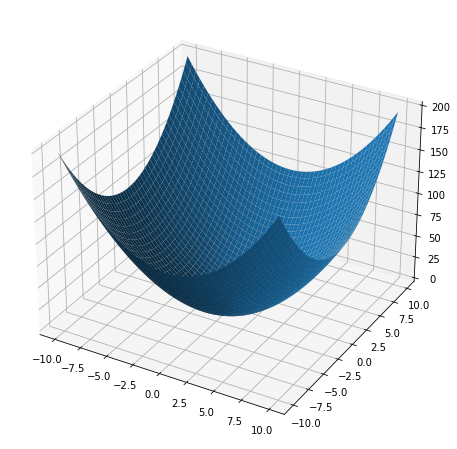

In [3]:
def makeData ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    Ugrid = xgrid**2 + ygrid**2
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, U)

plt.show()

### Пример №2

Возьмем параболоид ветвями вниз

### $$U(x,y)=-x^2-y^2$$

Найдем частные производные, приравняем их к нулю и найдем стационарные точки:

### $$\begin{cases}
   U'_{x}=-2x=0, \\
   U'_{y}=-2y=0 
 \end{cases}$$
 
 Получаем единственную стационарную точку $(0,0)$. Теперь найдем вторые производные и составим матрицу Гёссе
 
###  $$U''_{xx}=-2$$ $$U''_{xy}=U''_{yx}=0$$  $$U''_{yy}=-2$$
 
 $$\begin{pmatrix}
-2 & 0\\ 
0 & -2\\
\end{pmatrix}$$

теперь можно вычислить главные миноры 

### $$\Delta_{1}=U''_{xx}=-2<0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=(-2) \cdot (-2) - 0^2=4>0$$

Первый минор положительный, второй поменял знак. Это говорит о том, что найденная точка (0,0) является точкой максимума.

#### Замечание 1

### $$dU^2=U''_{xx}dx^2+2U''_{xy}dxdy+U''_{yy}dy^2=-2dx^2-2dy^2=-2\cdot(dx^2+dy^2)$$

При любых, отличных от нуля, $dx$ и $dx$ полный дифференциал второго порядка отрицательный, это так же говорит о точке максимума.

#### Замечание 2
Найдем собственные значения:

In [4]:
a = np.array([[-2, 0], [0, -2]])
w, v = np.linalg.eig(a)

print(f'Матрица Гёссе:\n{a}')
print(f'Собственные значения:\n{w}')

Матрица Гёссе:
[[-2  0]
 [ 0 -2]]
Собственные значения:
[-2. -2.]


Все собственные значения отрицательные. За счёт этого идет чередование знаков миноров.

Постоим график.

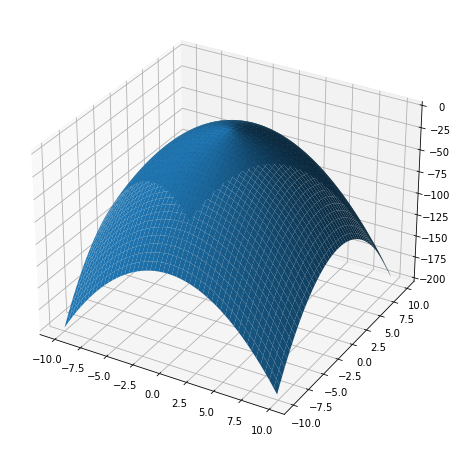

In [5]:
def makeData ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    Ugrid = -xgrid**2 - ygrid**2
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, U)

plt.show()

### Пример №3

Возьмем гиперболический параболоид

### $$U(x,y)=x^2-y^2$$

Найдем частные производные, приравняем их к нулю и найдем стационарные точки:

### $$\begin{cases}
   U'_{x}=2x=0, \\
   U'_{y}=-2y=0 
 \end{cases}$$
 
 Получаем единственную стационарную точку $(0,0)$. Теперь найдем вторые производные и составим матрицу Гёссе
 
###  $$U''_{xx}=2$$ $$U''_{xy}=U''_{yx}=0$$  $$U''_{yy}=-2$$
 
###  $$\begin{pmatrix}
2 & 0\\ 
0 & -2\\
\end{pmatrix}$$

теперь можно вычислить главные миноры 

### $$\Delta_{1}=U''_{xx}=2>0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=2 \cdot (-2) - 0^2=-4<0$$

Первый минор положительный, второй отрицательный. Это говорит о том, что найденная точка (0,0) является седловой.

#### Замечание 1

### $$dU^2=U''_{xx}dx^2+2U''_{xy}dxdy+U''_{yy}dy^2=2dx^2-2dy^2=2\cdot(dx^2-dy^2)$$

Знак полного дифференциала второго порядка в данном случае может быть любым 

#### Замечание 2
Найдем собственные значения:

In [6]:
a = np.array([[2, 0], [0, -2]])
w, v = np.linalg.eig(a)

print(f'Матрица Гёссе:\n{a}')
print(f'Собственные значения:\n{w}')

Матрица Гёссе:
[[ 2  0]
 [ 0 -2]]
Собственные значения:
[ 2. -2.]


Собственные значения разных знаков

Постоим график.

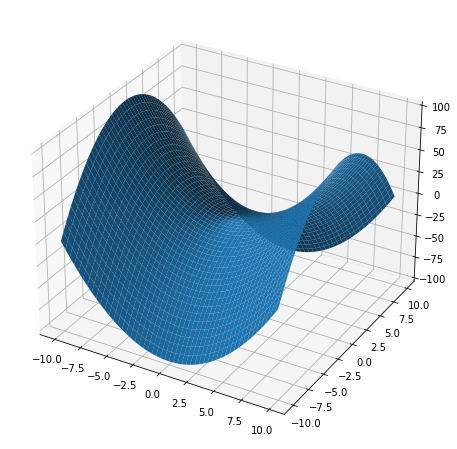

In [7]:
def makeData ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    Ugrid = xgrid**2 - ygrid**2
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, U)

plt.show()

### Пример №4

Возьмем теперь пример посложнее

### $$U(x,y)=-\frac{1}{2}x^2+8xy-y^3-13x-12y$$

Найдем частные производные, приравняем их к нулю и найдем стационарные точки:

### $$\begin{cases}
   U'_{x}=-x+8y-13=0, \\
   U'_{y}=8x-3y^2-12=0 
 \end{cases}$$
 
Выразим из первого уравнения $x$ и подставим во второе:

### $$\begin{cases}
   x=8y-13, \\
   3y^2-64y+116=0 
 \end{cases}$$
 
 При решении квадратного уравнения получаем два значения $y_{1}=2$ и $y_{2}=\frac{58}{3}$. При подстановки их в первое уравнение находим две точки: $(3,2)$ и $(\frac{425}{3},\frac{58}{3})$
 
Теперь найдем вторые производные и составим матрицу Гёссе в общем виде:
 
###  $$U''_{xx}=-1$$ $$U''_{xy}=U''_{yx}=8$$  $$U''_{yy}=-6y$$

Видно, что от переменных зависит только $U''_{yy}$

###  $$\begin{pmatrix}
-1 & 8\\ 
8 & -6y\\
\end{pmatrix}$$

теперь можно вычислить главные миноры 

### $$\Delta_{1}=U''_{xx}=-1<0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=(-1) \cdot (-6y) - 8^2=6y-64$$

Осталось проверить знаки миноров для каждой точки. 

Для точки $(3,2)$

### $$\Delta_{1}=U''_{xx}=-1<0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=(-1) \cdot (-6y) - 8^2=12-64<0$$

Т.е. $(3,2)$ - седловая точка

Для точки $(\frac{425}{3},\frac{58}{3})$

### $$\Delta_{1}=U''_{xx}=-1<0$$

### $$\Delta_{2}=\begin{vmatrix}
U''_{xx} & U''_{xy}\\ 
U''_{yx} & U''_{yy}\\
\end{vmatrix}=U''_{xx}\cdot U''_{yy}-(U''_{xy})^2=(-1) \cdot (-6y) - 8^2=116-64>0$$

Т.е. $(\frac{425}{3},\frac{58}{3})$ - точка максимума


#### Замечание 1 для точки $(\frac{425}{3},\frac{58}{3})$

### $$dU^2=U''_{xx}dx^2+2U''_{xy}dxdy+U''_{yy}dy^2=-dx^2+16dxdy-116dy^2=-dx^2+16dxdy-64dy^2-52dy^2$$

### $$dU^2=-(dx-8dy)^2-52dy^2$$

При любых, отличных от нуля, $dx$ и $dx$ полный дифференциал второго порядка отрицательный, это так же говорит о точке максимума.

#### Замечание 2 для точки $(\frac{425}{3},\frac{58}{3})$
Найдем собственные значения:

In [8]:
a = np.array([[-1, 8], [8, -116]])
w, v = np.linalg.eig(a)

print(f'Матрица Гёссе:\n{a}')
print(f'Собственные значения:\n{w}')

Матрица Гёссе:
[[  -1    8]
 [   8 -116]]
Собственные значения:
[  -0.45 -116.55]


Все собственные значения отрицательные. За счёт этого идет чередование знаков миноров.

Постоим график.

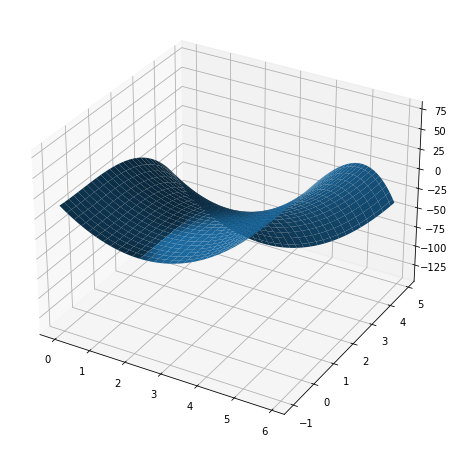

In [9]:
def makeData ():
    x = np.arange (0, 6, 0.1)
    y = np.arange (-1, 5, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    Ugrid = -0.5 * xgrid**2 + 8 * x * y - ygrid**3 - 13 * x - 12 * y
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, U)

plt.show()

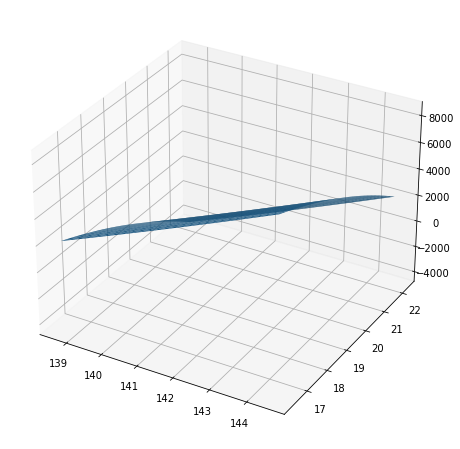

In [10]:
def makeData ():
    x = np.arange(416/3, 434/3, 0.1)
    y = np.arange(49/3, 67/3, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    Ugrid = -0.5 * xgrid**2 + 8 * x * y - ygrid**3 - 13 * x - 12 * y
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, U)

plt.show()

### Аппроксимация. Метод наименьших квадратов.

__Аппроксимация - метод состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.__

Например: нелинейные функции линейными, дискретные данные функциями.

Требования:

- конкретных вид функции.

- минимальное отклонение от заданной функции.

__Т.е. в отличии от интерполяции не требует точно прохождение через точки, но при этом мы  заранее должны знать вид функции.__

В рамках курса математического анализа мы посмотрим 3 способа аппроксимации. 

На этом уроке разберем метод наименьших квадратов.

#### Идея 

Составить функцию с параметрами. При этом подобрать параметры так, чтобы функция прошла как можно ближе к данным точкам.

Этого можно добиться, составив функцию ошибок в виде параболоида ветвями вверх. Смысл в том, что такая функция всегда имеет минимум, поэтому найденную стационарную точку даже не нужно проверять. Отсюда и название метода наименьших квадратов.

#### Пример 
Начнем с простого примера. Аппроксимируем дискретные данные с помощью уравнения прямой $y=kx+b$. Данное уравнение еще называют уравнением прямой регрессии. 


|$X$:|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|...|$x_{n}$|
|------|------|------|------|------|------|------|
|$Y$:|$y_{1}$|$y_{2}$|$y_{3}$|$y_{4}$|...|$y_{n}$|


Представим уравнение в неявном виде:
### $$y-kx-b=0$$

Подставим по очереди в это уравнение наш точки, но т.к. точки на прямой не лежат, то в правой части равенства будет явно не $0$. Возьмем правую часть в виде погрешности $\varepsilon$ для каждой точки:
### $$y_{i}-kx_{i}-b=\varepsilon_{i}$$

Составим функцию ошибок, т.к. единственные неизвестные величины это $k$ и $b$, то функция ошибок будет зависеть только от них:
### $$U(k,b)=\varepsilon^2_{1}+\varepsilon^2_{2}+\varepsilon^2_{3}+\varepsilon^2_{4}+...+\varepsilon^2_{n}$$

Осталось только найти частные производные, приравнять их к нулю и решить систему уравнений.
### $$\begin{cases}
   U'_{k}=\sum\limits_{i=1}^n(-2x_{i}(y_{i}-kx_{i}-b))=0, \\
   U'_{b}=\sum\limits_{i=1}^n(-2(y_{i}-kx_{i}-b))=0 
 \end{cases}$$
 
 Если решить эту систему, получим следующее:
 
### $$\begin{cases}
   k=\frac{n\sum\limits_{i=1}^n{x_{i}y_{i}}-\sum\limits_{i=1}^n{x_{i}}\sum\limits_{i=1}^n{y_{i}}}{n\sum\limits_{i=1}^n{x^2_{i}}-(\sum\limits_{i=1}^n{x_{i}})^2}, \\
   b=\frac{\sum\limits_{i=1}^n{y_{i}}\sum\limits_{i=1}^n{x_{i}^2}-\sum\limits_{i=1}^n{x_{i}y_{i}}\sum\limits_{i=1}^n{x_{i}}}{n\sum\limits_{i=1}^n{x^2_{i}}-(\sum\limits_{i=1}^n{x_{i}})^2} 
 \end{cases}$$ 

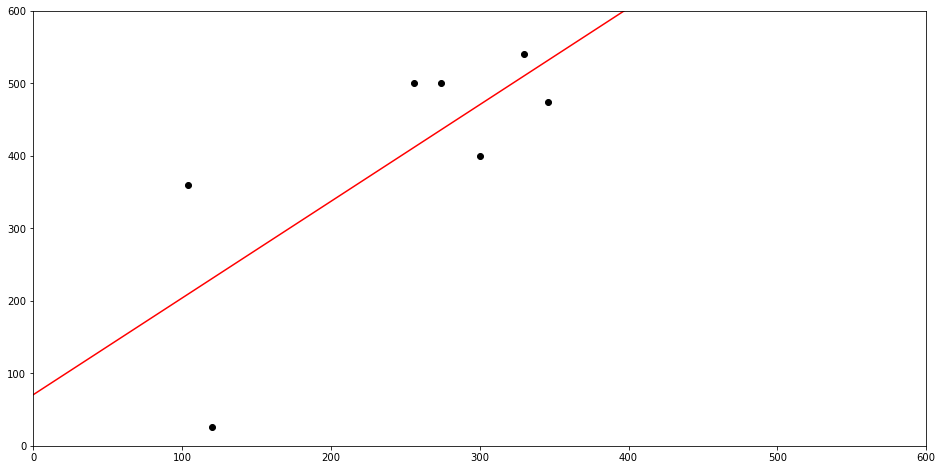

In [11]:


xi = np.array([120,256,104,346,330,274,300])
yi = np.array([26,500,360,475,540,500,400])

n = xi.size

k = (n * (xi * yi).sum() - xi.sum() * yi.sum()) / (n * (xi**2).sum() - (xi.sum())**2)

b = (yi.sum() * (xi**2).sum() - (xi * yi).sum() * xi.sum()) / (n * (xi**2).sum() - (xi.sum())**2)


x = np.linspace(0, 600, 200)
y = k * x + b

plt.figure(figsize=(16, 8))
plt.axis([0, 600, 0, 600])
plt.scatter(xi,yi, c='black')
plt.plot(x,y, c='r')
plt.show()

Чтобы понять на сколько хорошо прошла аппроксимация, можно вычислить значение коэффициента корреляции например в таком виде
### $$r=\sqrt{\frac{\sum\limits_{i=1}^n(y_{i}-\overline y)^2-\sum\limits_{i=1}^n(y_{i}-y(x_{i}))^2}{\sum\limits_{i=1}^n(y_{i}-\overline y)^2}}$$

Данный коэффициент будет принимать значения $r \in(0, 1)$. При этом оба крайних случая невозможны. Если коэффициент корреляции равен $1$, это означает что все точки лежал на графике функции.

In [12]:
y_mean = yi.sum() / n
r = np.sqrt(1 - ((yi - k * xi - b)**2).sum() / ((yi - y_mean)**2).sum())

print (r)

0.7361224599806504


Конечно, вместо уравнения прямой можно было взять любую другую функцию. Например:

$$y=ax^2+bx+c$$

$$y=ae^{bx}$$

$$y=\frac{1}{1+e^{-(ax+b)}}$$

Для численного решения систем уравнений можно воспользоваться функцией __fsolve__, основанная на методе Ньютона, который мы разберем на следующем уроке.

In [13]:
def equations(p):
    x, y = p
    # Запись системы уравнения вида x + y = 2, x - y = 0
    return (x + y - 2, x - y)

# Численное решение системы уравнений
x, y =  fsolve(equations, (0, 0))
print (x, y)

1.0 1.0


## Практическое задание

__1.__ Найти частные производные первого и второго порядка. Убедиться в равенстве смешанных производных.

### $$U=x^3+3xy^2+z^2-39x-36y+2z+26$$

__2.__ Найти частные производные первого и второго порядка. Убедиться в равенстве смешанных производных.

### $$U=\frac{256}{x}+\frac{x^2}{y}+\frac{y^2}{z}+z^2$$

__3.__ Найти производную функции $U=x^2+y^2+z^2$ по направлению вектора $\overrightarrow{c}(-9,8,-12)$ в точке $M(8,-12,9)$

__4.__ Найти производную функции $U=e^{x^2+y^2+z^2}$ по направлению вектора $\overrightarrow{c}(4,-13,-16)$ в точке $L(-16,4,-13)$

__5*.__ Найти производную функции $U=\log_{21}(x^2+y^2+z^2)$ в точке $F(-19,8,-4)$ по самому быстрому направлению.

__6.__ Исследовать на экстремум функцию:

### $$U=x^2y+\frac{1}{3}y^3+2x^2+3y^2-1$$

__7*.__ Исследовать на экстремум функцию:

### $$U=e^{-\frac{x}{2}}\cdot(x^2+y^2)$$

__8**.__ С помощью метода наименьших квадратов (МНК) подобрать значения параметров $a$ и $b$ для сигмоидальной функции $$y=\frac{1}{1+e^{-(ax+b)}}$$ 

по заданному распределению. Построить график.

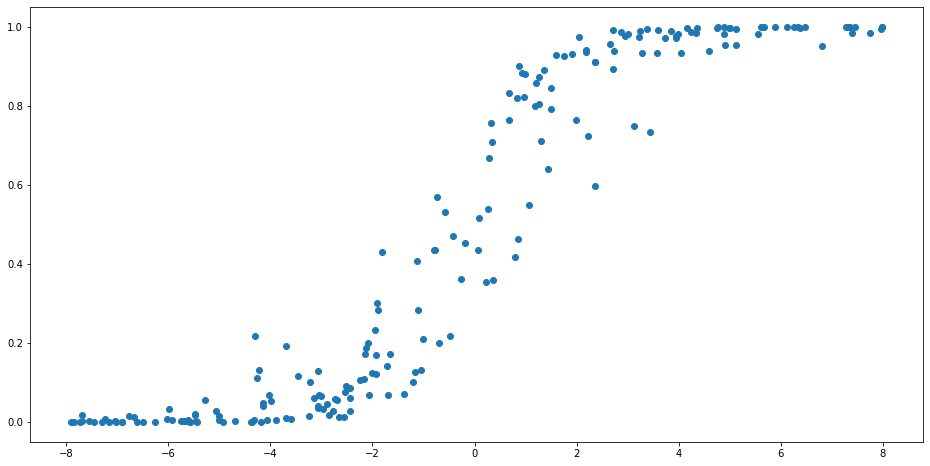

In [14]:
# Задаем рандомное распределение точек
xi = np.random.uniform(-8, 8, 200)
yi = 1 / (1 + np.exp(-np.random.uniform(0.5, 1.5, 200) * xi - np.random.uniform(-1, 1, 200)))

plt.figure(figsize=(16, 8))
plt.plot(xi,yi, marker="o", ls="")
plt.show()

## Дополнительные материалы

1. [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)
